In [1]:
# global definitions (Fig 13)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

from ches_dictionary import ches_dic

data_dir = '/home/foula/linate/plos_asonam_exp_data/spain/'

#results_dir = 'exp1_results/'
#graph_xlim = (0, 10)
#graph_ylim = (-1, 8)
#gridsize = 200

#results_dir = 'exp2_results/'
#graph_xlim = (0, 10)
#graph_ylim = (-10, 10)
#gridsize = 1000

#results_dir = 'exp3_results/'
#graph_xlim = (0, 10)
#graph_ylim = (-1, 8)
#gridsize = 200

#results_dir = 'exp4_results/'
#graph_xlim = (0, 8)
#graph_ylim = (-7, 10)
#gridsize = 1000

#results_dir = 'exp5_results/'
#graph_xlim = (0, 10)
#graph_ylim = (-1, 7)
#gridsize = 200

#results_dir = 'exp6_results/'
#graph_xlim = (0, 12)
#graph_ylim = (-6, 10)
#gridsize = 1000

#results_dir = 'exp7_results/'
#graph_xlim = (-2, 12)
#graph_ylim = (-1, 10)
#gridsize = 200

#results_dir = 'exp8_results/'
#graph_xlim = (-3, 20)
#graph_ylim = (-40, 10)
#gridsize = 1000

# exp1, exp2, exp3, exp4, exp5, exp6
#dimension_names_to_visualize = ['Left - economy - Right', 'People over elites (salience)']

results_dir = 'exp9_results/'
graph_xlim = (-2, 12)
graph_ylim = (-1, 10)
gridsize = 200

# exp7, exp8
dimension_names_to_visualize = ['Favors tax cuts', 'Opposes decentralization']

ches_dic_reverse = {}
for k in ches_dic.keys():
    ches_dic_reverse[ches_dic[k]] = k
                                                                  
dimensions_to_visualize = []
for dn in dimension_names_to_visualize:
    dimensions_to_visualize.append(ches_dic_reverse[dn].replace('ches_', 'ches2019_'))
print(dimensions_to_visualize)      

# Spain
followers_attitudinal_dimensions_file = data_dir + results_dir + 'source_attitudinal_dimensions.csv'
parliamentarians_attitudinal_dimensions_file = data_dir + results_dir + 'target_attitudinal_dimensions.csv'
party_attitudinal_dimensions_file = data_dir + results_dir + 'group_attitudinal_dimensions.csv'
parliamentarians_group_file = data_dir + 'Spain_reference_group.csv'
group_attitudes_file = data_dir + 'Spain_group_attitudes.csv'

group_graph_color_and_location_file = data_dir + 'party_graph_colors_and_location.csv'

country = 'Spain'
#graph_text_x = -1
#graph_text_y = 1.8
#legend_loc = 'lower left'

graph_file = data_dir + results_dir + 'spain_extended.pdf'

['ches2019_spendvtax', 'ches2019_regions']


In [2]:
# load attitudinal dimensions : followers

followers_df = pd.read_csv(followers_attitudinal_dimensions_file)
followers_df.head()

,entity,ches2019_spendvtax,ches2019_regions,ches2019_antielite_salience
0,0,7.171482,7.643137,1.903047
1,1,6.558169,7.148366,1.369692
2,2,10.020964,9.334940,-0.470346
3,3,5.707107,5.930731,1.897633
4,4,7.687803,8.018824,1.708351


In [3]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_attitudinal_dimensions_file)
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'entity', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names, and keep the ones which have attirudinal information
group_names_df = pd.read_csv(group_attitudes_file)
ches_cols = []
for c in group_names_df.columns:
    if c.startswith('ches'):
        ches_cols.append(c)
group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(214, 4)
(214, 6)
(203, 7)
(203, 12)


,entity,ches2019_spendvtax,ches2019_regions,ches2019_antielite_salience,i,k,party,color,dim_x,dim_y,dim_ax,dim_ay
0,0,6.987671,7.544485,2.020716,0,0,Cs,red,-0.2,0.3,0.1,0.1
1,1,5.534699,6.330294,3.916343,1,0,Cs,red,-0.2,0.3,0.1,0.1
2,3,7.214912,7.576314,2.095901,3,0,Cs,red,-0.2,0.3,0.1,0.1
3,4,7.912514,8.102836,1.115502,4,0,Cs,red,-0.2,0.3,0.1,0.1
4,5,8.017129,8.189348,0.796299,5,0,Cs,red,-0.2,0.3,0.1,0.1


In [4]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head(20)

,party,0
0,CDC,5
1,Cs,26
2,ECP,10
3,ERC-CATSI,8
4,IU,1
5,PP,65
6,PSOE,51
7,UP,36
8,UPM,1


In [5]:
group_names_df.head(20)

,k,party
0,0,Cs
1,1,ECP
2,2,PSOE
3,3,UP
4,4,IU
5,5,PP
8,8,UPM
9,9,CDC
10,10,ERC-CATSI


In [6]:
# also load/compute dimensions of parties (as the mean point of parliamentarias in the party)

#group_dimensions_df = parliamentarians_df.groupby('party')[dimensions_to_visualize].mean()
#group_dimensions_df = group_dimensions_df.reset_index()
#print(group_dimensions_df.shape)
#group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
#print(group_dimensions_df.shape)
#group_dimensions_df.head(20)

group_dimensions_df = pd.read_csv(party_attitudinal_dimensions_file)
group_dimensions_df = group_dimensions_df[['entity'] + dimensions_to_visualize]
#group_dimensions_df['entity'] = group_dimensions_df['entity'].astype(str)
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, group_names_df, left_on = 'entity',
                               right_on = 'k', how = 'inner')
group_dimensions_df.drop(columns = ['entity', 'k'], inplace = True)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(12, 3)
(9, 8)


,ches2019_spendvtax,ches2019_regions,party,color,dim_x,dim_y,dim_ax,dim_ay
0,7.173642,7.568293,Cs,red,-0.2,0.3,0.1,0.1
1,1.220885,1.299875,ECP,blue,-0.5,-0.4,0.1,0.1
2,4.257685,0.282915,ERC-CATSI,#71C671,-0.1,-0.5,0.1,0.1
3,2.442499,3.918241,PSOE,green,0.1,0.3,0.1,0.1
4,0.590547,2.428346,UP,#CD6090,0.2,-0.4,0.1,0.1
5,0.615224,2.521130,IU,brown,0.2,0.1,0.1,0.1
6,8.860680,8.357898,PP,orange,0.1,0.3,0.1,0.1
7,0.437200,2.241106,UPM,magenta,-0.4,0.3,0.1,0.1
8,5.534972,0.596482,CDC,yellow,0.1,0.3,0.1,0.1


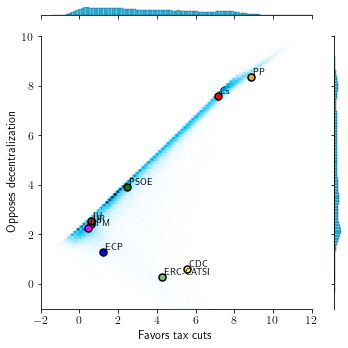

In [7]:
# visualization of two dimensions

xdim = dimensions_to_visualize[0]
ydim = dimensions_to_visualize[1]

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row['dim_ax']), float(row['dim_ay']))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])
#df = df[~df.index.duplicated()]

# use the followers + parliamentarians
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim, #) #,
                 joint_kws = dict(gridsize = gridsize)) 

#for _, row in parliamentarians_df.iterrows(): # TODO
#    g.ax_joint.plot(row[xdim] , row[ydim], '+', color = row[color_dim], mew = 1.0, ms = 7)

for _, row in group_dimensions_df.iterrows():
    g.ax_joint.plot(row[xdim], row[ydim], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    txt = g.ax_joint.text(row[xdim] + disp[row['party']][0],
                          row[ydim] + disp[row['party']][1], row.party, 
                          color = 'black', fontsize = 9)
                          #bbox = dict(boxstyle = "round", ec = 'black', fc = row[color_dim], alpha = 1),
                          
g.ax_joint.set_xlabel(dimension_names_to_visualize[0])
g.ax_joint.set_ylabel(dimension_names_to_visualize[1])

#txt = g.ax_joint.text(graph_text_x, graph_text_y, country, fontsize = 14)
#plt.legend(handles = ideo_legend_small, loc = legend_loc, fontsize = bidimensional_legend_fs)

plt.tight_layout()

plt.savefig(graph_file)

plt.show()